In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from rpca import R_pca

In [44]:
frames = []
tot_frames = 60
curr_frame = 0
path = "highway.avi"
cap = cv2.VideoCapture(path)
ret = True
while ret and curr_frame < tot_frames:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        frames.append(img)
    curr_frame += 1
video = np.stack(frames, axis=0)

In [45]:
init_shape = video.shape

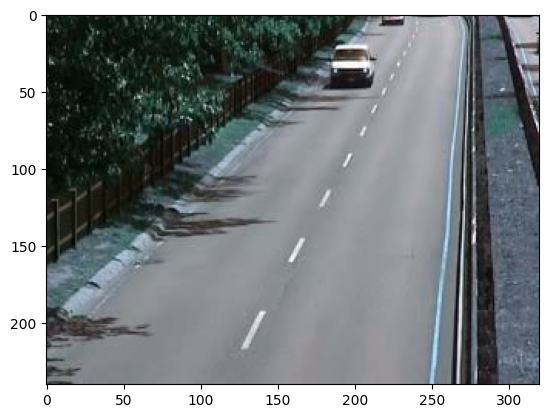

In [46]:
plt.imshow(video[-10])

In [47]:
imgs = video.copy()
imgs = imgs.reshape((tot_frames,-1))
max_val =  np.max(imgs)
imgs = imgs/max_val

In [48]:
rpca = R_pca(imgs,mu=10,lmbda=0.001)
L,S = rpca.fit(tol =1e-8,max_iter=10,iter_print=1)

iteration: 1, error: 17.55593988051515
iteration: 2, error: 8.036459632578909
iteration: 3, error: 6.085892531290016
iteration: 4, error: 4.994279651664205
iteration: 5, error: 4.341910401692758
iteration: 6, error: 4.013120184024547
iteration: 7, error: 3.5695244739539107
iteration: 8, error: 3.592744688109188
iteration: 9, error: 3.271516296654386
iteration: 10, error: 3.224723061702618


In [49]:
S = S.reshape(init_shape)*max_val
L = L.reshape(init_shape)*max_val

In [50]:
L[0].shape

(240, 320, 3)

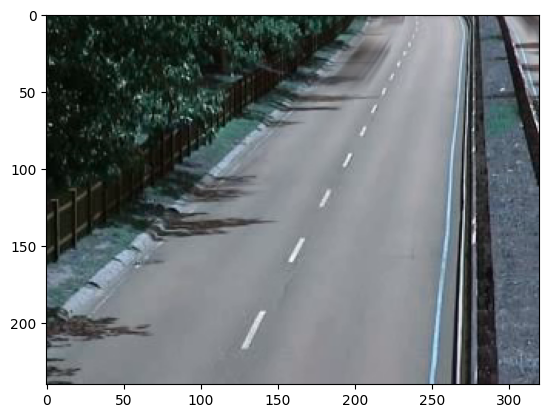

In [51]:
plt.imshow(L[0].astype(int))